In [10]:
### Use this workbook FOURTH in sequence.
### This workbook explores just voting and aid data, without World Bank info added.

# Initial setup

import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_rows = 800

data = pd.read_csv('Modified_Data/VoteDiffsWithTotalAid.csv')
data.index.name = 'record'
data

,Unnamed: 0,issue,membership,vote_foreign,code,name,year,aid,total_aid,vote_usa,vote_diff
record,,,,,,,,,,,
0,0,20.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,1,0
1,1,21.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1
2,2,22.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,3,4
3,3,23.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1
4,4,24.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,1,0
5,5,25.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,1,0
6,6,26.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,3,1
7,7,27.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1
8,8,28.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1


In [11]:
# More initial setup

lookup = pd.read_csv('Modified_Data/Lookup.csv')[['code', 'year', 'amount', 'total_previous_aid']]
lookup

,code,year,amount,total_previous_aid
0,0,2016,0.000,0.000
1,0,2017,0.000,0.000
2,AFG,1946,0.000,0.000
3,AFG,1947,0.000,0.000
4,AFG,1948,0.000,0.000
5,AFG,1949,0.000,0.000
6,AFG,1950,8340.000,8340.000
7,AFG,1951,791387.000,799727.000
8,AFG,1952,2283030.000,3082757.000
9,AFG,1953,16443254.000,19526011.000


In [12]:
# PROJECT ONE: Group data by final aid totals to create a histogram

maxaid = lookup.groupby('code')['total_previous_aid'].max()
maxaid

code
0                     0.000
AFG        117893386763.000
AGO          2535228967.000
ALB          1543086740.000
AND                   0.000
ARE            28409933.000
ARG          2950825226.000
ARM          2668032499.000
ATG            46741973.000
AUS           694960738.000
AUT         10345489941.000
AZE          1288736431.000
BDI          1449167347.000
BEL         14553627102.000
BEN          2091460941.000
BFA          2305105304.000
BGD         14547607804.000
BGR          1042637602.000
BHR           713070471.000
BHS           180518729.000
BIH          3129967165.000
BLR           766352585.000
BLZ           446465096.000
BOL         10331295617.000
BRA         17420122145.000
BRB            69262267.000
BRN              887889.000
BTN            22973742.000
BWA          2259243061.000
CAF           825447038.000
CAN           597317611.000
CHE              981321.000
CHL          7639797261.000
CHN          1158624239.000
CIV          1886107598.000
CMR          17

In [13]:
# Identify the particular countries who received the least aid, as part of data exploration
maxaid.sort_values().head(30)

code
0               0.000
USA             0.000
EAZ             0.000
SMR             0.000
LIE             0.000
LUX             0.000
MCO             0.000
DDR             0.000
YUG             0.000
NYEMEN          0.000
AND             0.000
NRU        196911.000
TUV        337376.000
BRN        887889.000
CHE        981321.000
DEU       7447833.000
KWT      10282399.000
VCT      12701890.000
QAT      13013203.000
KIR      13503198.000
LCA      14022753.000
DMA      14200034.000
KNA      15353285.000
YMD      20592100.000
BTN      22973742.000
ARE      28409933.000
TON      35328334.000
SLB      36187537.000
FJI      38590995.000
MDV      42901476.000
Name: total_previous_aid, dtype: float64

In [16]:
# Identify the particular countries who received the most aid, as part of data exploration
maxaid.sort_values().tail(10)

code
PAK    61595541497.000
IND    65611897533.000
TUR    66432398158.000
FRA    67025776608.000
GBR    74881727139.000
KOR    78935990227.000
IRQ    81650636378.000
AFG   117893386763.000
EGY   134799038179.000
ISR   227634027836.000
Name: total_previous_aid, dtype: float64

In [17]:
import numpy as np
logaid = np.log10(maxaid + 1)
max_hist = logaid.hist(bins=30)
max_hist.set_xlabel('Total Aid in 10^x USD')
max_hist.set_ylabel('# of Countries')
max_hist.plot(title='Histogram of Total US Aid by Country')
max_hist.set_title('Histogram of Total US Aid by Country')

Text(0.5,1,'Histogram of Total US Aid by Country')

In [18]:
# PROJECT TWO: Group aid by year for all countries combined to see how aid varies over time

totalaidbyyear = lookup.groupby('year')['amount'].sum()
totalaidbyyear

year
1946   18952106657.000
1947   56363746797.000
1948   17808236369.000
1949   55997926191.000
1950   42259001099.000
1951   48845375301.000
1952   43116579728.000
1953   28314221991.000
1954   22260709788.000
1955   22767044434.000
1956   28965255924.000
1957   24797258845.000
1958   21388395578.000
1959   25642061155.000
1960   28140918037.000
1961   28626201348.000
1962   33406446850.000
1963   30728157798.000
1965   23091602583.000
1966   26137754991.000
1967   22026353552.000
1968   22016564639.000
1969   19069884984.000
1970   16874262132.000
1971   21568286350.000
1972   23455250811.000
1973   17537242030.000
1974   22136982195.000
1975   15643421386.000
1976   27350730450.000
1977   18176460008.000
1978   19527966257.000
1979   30203067848.000
1980   16441923386.000
1981   17845530986.000
1982   19025400697.000
1983   21624903699.000
1984   22857222276.000
1985   26715861497.000
1986   23868113388.000
1987   20356970426.000
1988   18961723935.000
1989   18550898949.000
1990  

Text(0,0.5,'$10 billion')

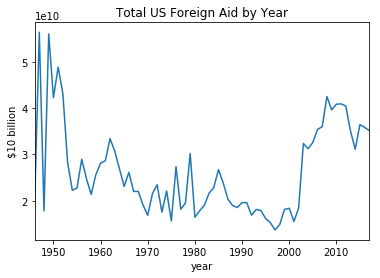

In [19]:
aidbyyear = totalaidbyyear.plot(kind='line', title='Total US Foreign Aid by Year')
aidbyyear.set_ylabel('$10 billion')

In [20]:
# PROJECT THREE: line up countries based on their average voting difference from the USA

votealign = data.groupby('code')['vote_diff'].mean()
votealign = votealign.sort_values()
votealign

code
USA        0.000
ISR        0.519
EAZ        0.588
TWN        0.651
WGERMANY   0.695
PLW        0.720
GBR        0.735
FSM        0.814
CAN        0.844
FRA        0.917
LUX        0.943
BEL        0.944
NLD        0.959
ITA        0.998
AUS        1.008
MHL        1.043
DNK        1.125
ISL        1.135
NOR        1.139
JPN        1.153
NZL        1.163
PRT        1.191
KIR        1.214
SWE        1.288
IRL        1.299
NRU        1.311
AUT        1.315
ZAF        1.317
ESP        1.317
SSD        1.365
GRC        1.376
FIN        1.380
LVA        1.455
DEU        1.479
GEO        1.484
TUR        1.489
MCO        1.493
DMA        1.500
EST        1.504
LTU        1.508
CZE        1.522
BIH        1.541
HRV        1.548
SVN        1.557
SVK        1.562
GNQ        1.567
PRY        1.574
MDA        1.580
AND        1.580
MKD        1.608
SMR        1.624
KNA        1.644
LIE        1.651
MNE        1.657
LBR        1.662
HND        1.676
DOM        1.695
KOR        1.697
GTM      

In [21]:
votealign.columns = ['alignment']

Text(0,0.5,'Always Agree = 0, Always Disagree = 4')

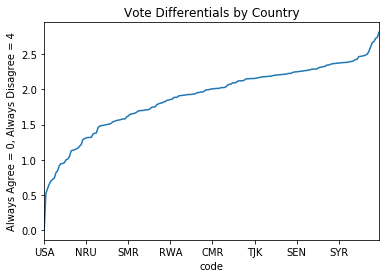

In [22]:
votealignplot = votealign.plot(title='Vote Differentials by Country')
votealignplot.set_ylabel('Always Agree = 0, Always Disagree = 4')

In [23]:
lookup

,code,year,amount,total_previous_aid
0,0,2016,0.000,0.000
1,0,2017,0.000,0.000
2,AFG,1946,0.000,0.000
3,AFG,1947,0.000,0.000
4,AFG,1948,0.000,0.000
5,AFG,1949,0.000,0.000
6,AFG,1950,8340.000,8340.000
7,AFG,1951,791387.000,799727.000
8,AFG,1952,2283030.000,3082757.000
9,AFG,1953,16443254.000,19526011.000


In [24]:
# Check the full names of the countries used in the graph immediately above
data[data['code'].isin(['NRU', 'SMR', 'RWA', 'CMR', 'TJK', 'SEN', 'SYR'])].drop_duplicates(subset = ['code'])

,Unnamed: 0,issue,membership,vote_foreign,code,name,year,aid,total_aid,vote_usa,vote_diff
record,,,,,,,,,,,
148583,148583,627.000,1.000,3,CMR,Cameroon,1960,649110.000,649110.000,1,4
582073,582073,4169.000,1.000,2,NRU,Nauru,1999,0.000,0.000,3,1
659110,659110,805.000,1.000,2,RWA,Rwanda,1962,5070555.000,5070555.000,1,1
674684,674684,627.000,1.000,3,SEN,Senegal,1960,0.000,0.000,1,4
698711,698711,3662.000,1.000,1,SMR,San Marino,1992,0.000,0.000,1,0
731934,731934,3.000,1.000,1,SYR,Syrian Arab Republic,1946,0.000,0.000,1,0
753349,753349,3662.000,1.000,2,TJK,Tajikistan,1992,16075391.000,16075391.000,1,1


In [25]:
# PROJECT FOUR: Start building a scatterplot between country total aid and country vote differentials

votealigndf = votealign.to_frame()
votealigndf

,vote_diff
code,
USA,0.000
ISR,0.519
EAZ,0.588
TWN,0.651
WGERMANY,0.695
PLW,0.720
GBR,0.735
FSM,0.814
CAN,0.844


In [26]:
maxaiddf = maxaid.to_frame()
maxaiddf

,total_previous_aid
code,
0,0.000
AFG,117893386763.000
AGO,2535228967.000
ALB,1543086740.000
AND,0.000
ARE,28409933.000
ARG,2950825226.000
ARM,2668032499.000
ATG,46741973.000


In [27]:
summary = votealigndf.merge(maxaiddf, how='left', on='code')
summary

,vote_diff,total_previous_aid
code,,
USA,0.000,0.000
ISR,0.519,227634027836.000
EAZ,0.588,0.000
TWN,0.651,43988589087.000
WGERMANY,0.695,919318970.000
PLW,0.720,1019735311.000
GBR,0.735,74881727139.000
FSM,0.814,4089620882.000
CAN,0.844,597317611.000


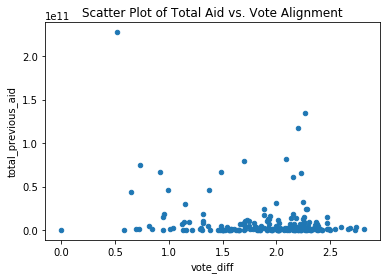

In [28]:
# Generate the scatterplot of voting alignment vs. total previous aid
summary.plot.scatter(x='vote_diff', y='total_previous_aid', logy=False, title='Scatter Plot of Total Aid vs. Vote Alignment')

In [29]:
# Run a linear regression to predict voting alignment from total previous aid

import statsmodels.api as sm
from statsmodels.formula.api import ols
mod_aid = ols('vote_diff ~ total_previous_aid', summary).fit()
print(mod_aid.summary())

                            OLS Regression Results                            
Dep. Variable:              vote_diff   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     8.322
Date:                Sat, 23 Nov 2019   Prob (F-statistic):            0.00435
Time:                        22:21:44   Log-Likelihood:                -137.05
No. Observations:                 200   AIC:                             278.1
Df Residuals:                     198   BIC:                             284.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.9319      0

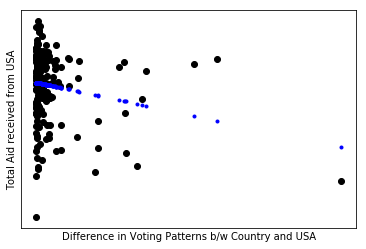

In [30]:
# Plot the correlation calculated above, with predicted values shown as small blue dots and actual values
# shown as large black dots

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Define relevant variables
X = summary['total_previous_aid'].values.reshape(-1, 1)
y_actual = summary['vote_diff'].values

# Train the model using the training sets
regr.fit(X, y_actual)

# Make predictions using the testing set
y_pred = regr.predict(X)

# Plot outputs
plt.scatter(X, y_actual,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=0, marker='.')

plt.xticks(())
plt.yticks(())
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams.update({'font.size': 18})

plt.xlabel('Difference in Voting Patterns b/w Country and USA')
plt.ylabel('Total Aid received from USA')

plt.show()

In [31]:
# Examine the data from the linear regression to confirm that it is functioning correctly
summary['y_pred'] = y_pred
summary.head()

,vote_diff,total_previous_aid,y_pred
code,,,
USA,0.000,0.000,1.932
ISR,0.519,227634027836.000,1.010
EAZ,0.588,0.000,1.932
TWN,0.651,43988589087.000,1.754
WGERMANY,0.695,919318970.000,1.928


In [32]:
# Identify the largest residuals in the linear regression

summary['y_resid'] = abs(summary['vote_diff'] - summary['y_pred'])
summary.sort_values('y_resid').tail(10)

,vote_diff,total_previous_aid,y_pred,y_resid
code,,,,
AUS,1.008,694960738.000,1.929,0.921
BEL,0.944,14553627102.000,1.873,0.929
LUX,0.943,0.000,1.932,0.989
CAN,0.844,597317611.000,1.929,1.085
FSM,0.814,4089620882.000,1.915,1.101
TWN,0.651,43988589087.000,1.754,1.103
PLW,0.720,1019735311.000,1.928,1.207
WGERMANY,0.695,919318970.000,1.928,1.233
EAZ,0.588,0.000,1.932,1.344


In [33]:
# Remove the 10 most prominent outliers from the dataset and then look to see what the next 10 largest residuals are.

outliers = summary.sort_values('y_resid').tail(10).index
no_outliers = summary.drop(outliers).sort_values('y_resid')
no_outliers

,vote_diff,total_previous_aid,y_pred,y_resid
code,,,,
UZB,1.926,1277787093.000,1.927,0.000
CIV,1.920,1886107598.000,1.924,0.004
ROU,1.932,1496678722.000,1.926,0.006
SWZ,1.916,890530097.000,1.928,0.012
TUV,1.917,337376.000,1.932,0.015
BOL,1.912,10331295617.000,1.890,0.022
WSM,1.954,95184203.000,1.932,0.022
STP,1.909,55813072.000,1.932,0.023
SOM,1.928,6882563597.000,1.904,0.024


In [34]:
# Re-run the linear regression on the dataset without the 10 most prominent outliers

no_outlier_aid = ols('vote_diff ~ total_previous_aid', no_outliers).fit()
print(no_outlier_aid.summary())

                            OLS Regression Results                            
Dep. Variable:              vote_diff   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     13.98
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           0.000246
Time:                        22:21:56   Log-Likelihood:                -95.944
No. Observations:                 190   AIC:                             195.9
Df Residuals:                     188   BIC:                             202.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.9978      0

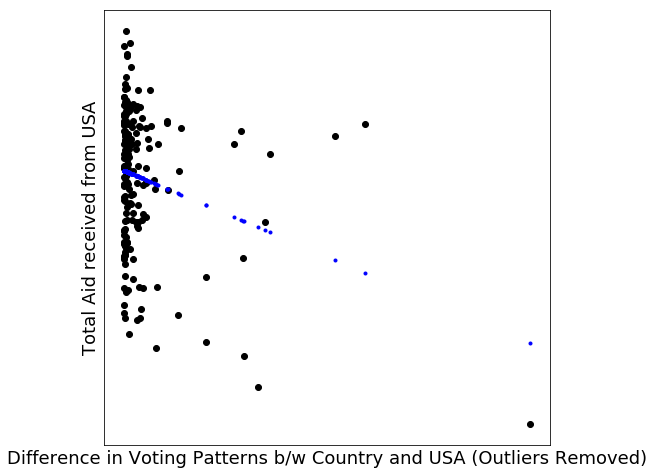

In [35]:
# Graph the linear regression again on the dataset without the 10 largest outliers.

# Create linear regression object
regr2 = linear_model.LinearRegression()

# Define relevant variables
X = no_outliers['total_previous_aid'].values.reshape(-1, 1)
y_actual = no_outliers['vote_diff'].values

# Train the model using the training sets
regr2.fit(X, y_actual)

# Make predictions using the testing set
y_pred = regr2.predict(X)

# Plot outputs
plt.scatter(X, y_actual,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=0, marker='.')

plt.xticks(())
plt.yticks(())
plt.rcParams["figure.figsize"] = (25,25)
plt.rcParams.update({'font.size': 14})

plt.xlabel('Difference in Voting Patterns b/w Country and USA (Outliers Removed)')
plt.ylabel('Total Aid received from USA')

plt.show()

In [36]:
# PROJECT FIVE: create a scatterplot with individual country-years

In [37]:
# Calculate the average voting alignment for all countries combined in each year
avg_align = data.groupby(['code', 'year'])['vote_diff'].mean()
avg_align

code      year
AFG       1946   1.192
          1947   1.711
          1948   1.297
          1949   1.510
          1950   1.200
          1951   1.714
          1952   1.786
          1953   1.500
          1954   1.258
          1955   1.405
          1956   0.898
          1957   1.308
          1958   1.355
          1959   1.607
          1960   2.519
          1961   1.774
          1962   1.955
          1963   1.312
          1965   1.786
          1966   1.722
          1967   2.400
          1968   1.712
          1969   1.682
          1970   1.612
          1971   1.381
          1972   1.046
          1973   1.543
          1974   1.539
          1975   1.500
          1976   1.674
          1977   1.194
          1978   1.352
          1979   2.048
          1980   2.243
          1981   2.478
          1982   2.737
          1983   2.725
          1984   2.901
          1985   2.826
          1986   2.684
          1987   2.683
          1988   2.784
          1989   2.

In [38]:
#Caluclate the total aid delivered to each country in each year
aid_so_far = data.groupby(['code', 'year'])['total_aid'].first()
aid_so_far

code      year
AFG       1946              0.000
          1947              0.000
          1948              0.000
          1949              0.000
          1950           8340.000
          1951         799727.000
          1952        3082757.000
          1953       19526011.000
          1954       37991697.000
          1955       52649285.000
          1956      183382281.000
          1957      328002025.000
          1958      423576006.000
          1959      603918115.000
          1960      673372854.000
          1961      878263506.000
          1962     1134332884.000
          1963     1250993014.000
          1965     1458088854.000
          1966     1656954317.000
          1967     1846721032.000
          1968     1939362431.000
          1969     2023022928.000
          1970     2067097335.000
          1971     2133895694.000
          1972     2299332207.000
          1973     2470514567.000
          1974     2529190777.000
          1975     2609425263.000

In [39]:
# Transform the dataset with a multi-level index to capture the voting alignment and aid received for each country-year

avg_align_df = avg_align.to_frame()
aid_so_far_df = aid_so_far.to_frame()
substance = avg_align_df.merge(aid_so_far_df, how='left', on=['code', 'year'])
substance

vote_diff        total_aid
code     year                            
AFG      1946      1.192            0.000
         1947      1.711            0.000
         1948      1.297            0.000
         1949      1.510            0.000
         1950      1.200         8340.000
         1951      1.714       799727.000
         1952      1.786      3082757.000
         1953      1.500     19526011.000
         1954      1.258     37991697.000
         1955      1.405     52649285.000
         1956      0.898    183382281.000
         1957      1.308    328002025.000
         1958      1.355    423576006.000
         1959      1.607    603918115.000
         1960      2.519    673372854.000
         1961      1.774    878263506.000
         1962      1.955   1134332884.000
         1963      1.312   1250993014.000
         1965      1.786   1458088854.000
         1966      1.722   1656954317.000
         1967      2.400   1846721032.000
         1968      1.712   1939362431.000
         1969      1.682   2023022928.000
         1970      1.612   2067097335.000
         1971      1.381   2133895694.000
         1972      1.046   2299332207.000
         1973      1.543   2470514567.000
         1974      1.539   2529190777.000
         1975      1.500   2609425263.000
         1976      1.674   2655959573.000
         1977      1.194   2726517545.000
         1978      1.352   2762440870.000
         1979      2.048   2792426228.000
         1980      2.243   2792426228.000
         1981      2.478   2792426228.000
         1982      2.737   2792426228.000
         1983      2.725   2792426228.000
         1984      2.901   2792426228.000
         1985      2.826   2799108058.000
         1986      2.684   2816360117.000
         1987      2.683   2821255700.000
         1988      2.784   2874437093.000
         1989      2.803   2975824520.000
         1990      2.814   3001782629.000
         1991      2.581   3034951225.000
         1992      2.533   3085738761.000
         1993      2.200   3145602500.000
         1994      2.118   3149385891.000
         1995      2.443   3168276167.000
         1996      1.974   3192721780.000
         1997      2.357   3239979360.000
         1998      1.855   3252205799.000
         1999      1.544   3302306656.000
         2000      1.701   3377311956.000
         2001      1.985   3501856665.000
         2002      2.014   4179714779.000
         2003      2.622   5466682920.000
         2004      2.792   7943148168.000
         2005      3.000  10084193259.000
         2006      2.931  13685052109.000
         2007      3.247  19496742207.000
         2008      3.145  29623942220.000
         2009      2.800  39754679761.000
         2010      2.773  51935283289.000
         2011      2.603  66647956165.000
         2012      2.743  80768510830.000
         2013      3.017  91092377763.000
         2014      2.700  98650184061.000
         2015      2.821 107015834431.000
         2016      2.520 112162910337.000
         2017      2.840 117893386763.000
AGO      1976      0.582            0.000
         1977      1.173       612273.000
         1978      1.241      3563412.000
         1979      1.912      7921683.000
         1980      2.117     24032559.000
         1981      2.396     33097026.000
         1982      2.631     38252567.000
         1983      2.584     40501311.000
         1984      2.940     46087263.000
         1985      2.452     54441039.000
         1986      2.787     60869113.000
         1987      2.725     67312466.000
         1988      2.799     74837892.000
         1989      2.761     78781581.000
         1990      2.535     82320071.000
         1991      2.338     93596367.000
         1992      2.560    151377109.000
         1993      2.138    220404124.000
         1994      1.618    314856276.000
         1995      1.316    382415369.000
         1996      2.145    518475304.000
         1997      2.071    595963440.000
         1998      2.371 

In [40]:
# Drop the multi-level index to assist with visualization
substance = substance.reset_index()

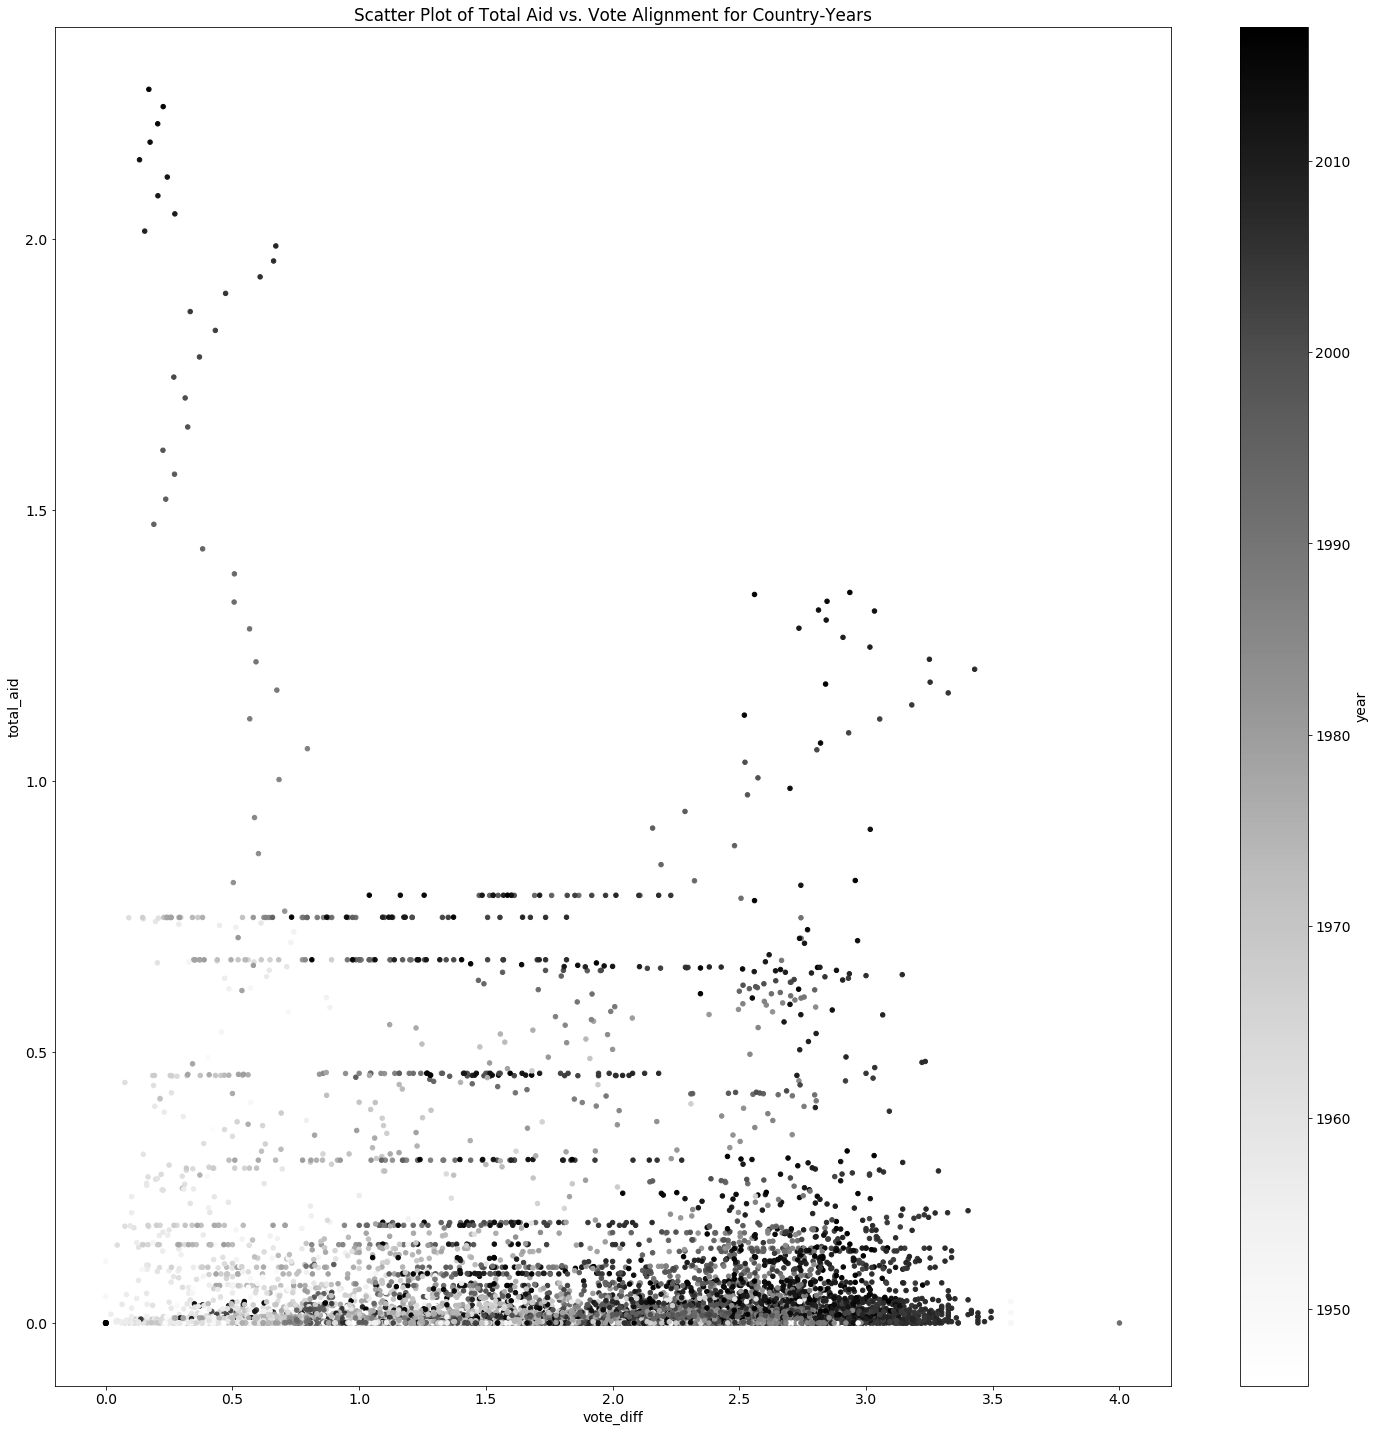

In [41]:
# Create a scatterplot of each country-year, with voting alignment on the x-axis, total aid in tens of billions of USD
# on the y-axis, and the year of the observation shaded from white (distant past) to black (present).

substance['total_aid'] = substance['total_aid'] / 1e11
substance.plot.scatter(x='vote_diff', y='total_aid', c = 'year', logy=False, title='Scatter Plot of Total Aid vs. Vote Alignment for Country-Years')

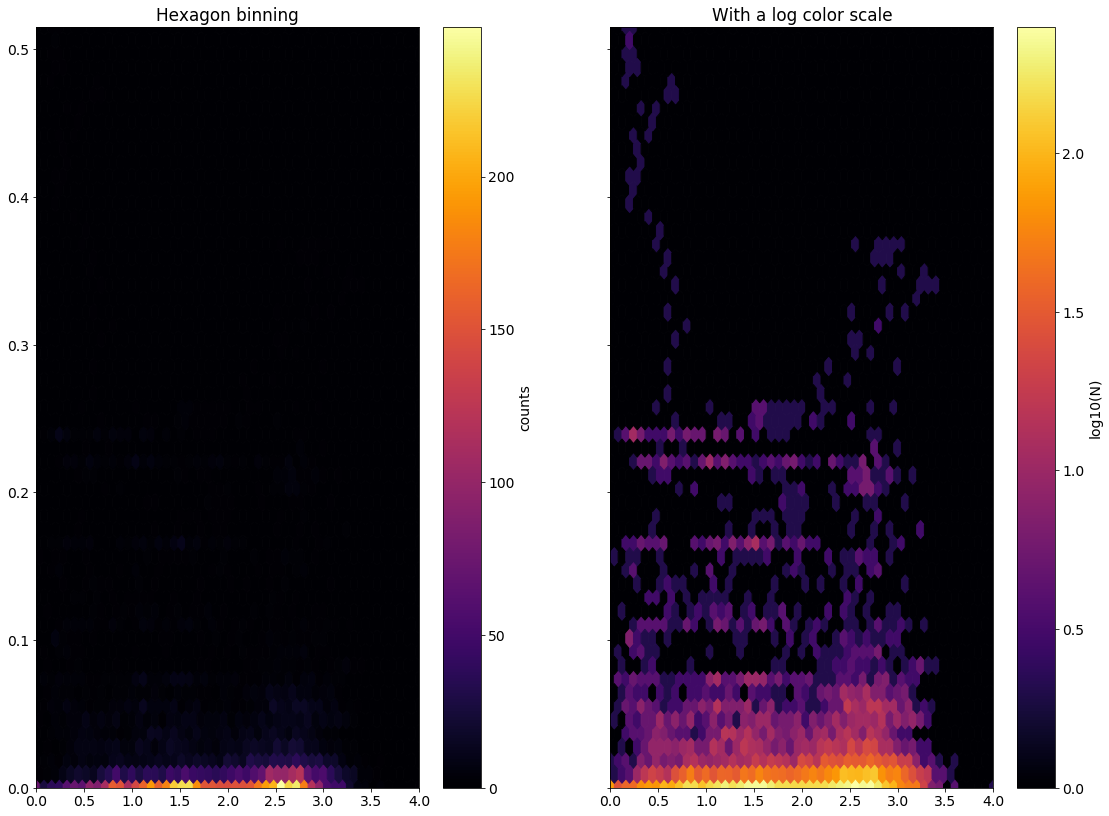

In [42]:
# Use a hexbin heatmap to attempt to identify any additional trends in the country-year vs. aid vs. voting alignment matrix
# (none found)

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100000
x = substance['vote_diff']
y = np.log10(substance['total_aid'] + 1)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(17, 14))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()